# Task 1 - Prediction using Supervised ML

#### _To Predict the percentage of marks of the students based on the number of hours they studied._

### Author: __Yogeshvar M__

### Importing

In [97]:
#Importing_Libraries

import pandas as pd                                  #pandas used for data analysis
import matplotlib.pyplot as plt                      #pyplot provides matlab like interface
import seaborn as sns                                #seaborn used for making statistical graphics
from sklearn.model_selection import train_test_split #sklearn is simple and efficient tools for predictive data analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error


In [3]:
#Importing_Dataset

marks=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
marks

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis

In [10]:
#Getting_information_about_dataset

marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
#Finding_missing_data_percentage_in_dataframe

for col in marks.columns:
    percentage_missing=np.mean(marks[col].isnull())
    print(f"{col} : {round(percentage_missing*100)}%")


Hours : 0%
Scores : 0%


In [22]:
#Checking_for_NULL_values_in_Dataset

check=marks.notnull()
print(check)

    Hours  Scores
0    True    True
1    True    True
2    True    True
3    True    True
4    True    True
5    True    True
6    True    True
7    True    True
8    True    True
9    True    True
10   True    True
11   True    True
12   True    True
13   True    True
14   True    True
15   True    True
16   True    True
17   True    True
18   True    True
19   True    True
20   True    True
21   True    True
22   True    True
23   True    True
24   True    True


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

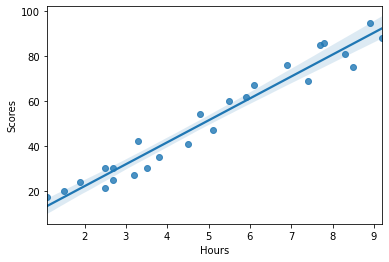

In [94]:
#Understanding_the_Relationship_between_Hours_And_Scores_using_Regression_Plot

sns.regplot(x='Hours',y='Scores',data=marks)

### Machine Learning:Supervised Learning

In [34]:
#Spliting_the_data

attribute=marks.iloc[:,:-1].values
target=marks.iloc[:,-1].values

print(f"The attribute values are \n {attribute}")
print(f"The label/target values are \n {target}")

The attribute values are 
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
The label/target values are 
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [46]:
#Splitting_the_Training_and_Testing_Data

train_attribute,test_attribute,train_target,test_target = train_test_split(attribute,target,train_size=0.7,
                                                                           test_size=0.3)


In [38]:
#Fitting_the_training_data_into_model

model=LinearRegression()
model.fit(train_attribute,train_target)

LinearRegression()

In [51]:
#Checking_the_model

checking=model.predict(test_attribute)
prediction=pd.DataFrame({"Hours":[h for h in test_attribute],"Marks":[m for m in checking]})
prediction

,Hours,Marks
0,[2.7],30.378972
1,[8.3],82.015213
2,[7.7],76.482759
3,[6.1],61.729547
4,[4.8],49.742563
5,[6.9],69.106153
6,[1.1],15.625761
7,[3.8],40.521805


In [52]:
#Comparing_the_predicted_marks_with_actual_marks

comparing=pd.DataFrame({"Actual Mark":test_target,"Predicted Mark":checking})
comparing

,Actual Mark,Predicted Mark
0,30,30.378972
1,81,82.015213
2,85,76.482759
3,67,61.729547
4,54,49.742563
5,76,69.106153
6,17,15.625761
7,35,40.521805


<module 'matplotlib.pyplot' from 'C:\\Users\\varyo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

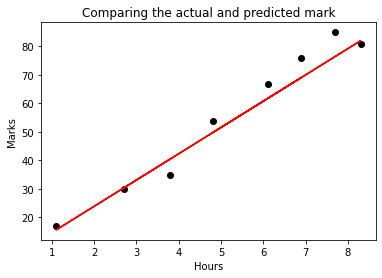

In [64]:
#Visually_Comparing_the_marks_of_Predicted_and_Actual_Mark

plt.scatter(x=test_attribute,y=test_target,color='Black')
plt.plot(test_attribute,checking,color='Red')
plt.title("Comparing the actual and predicted mark")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt

### Question: What will be the predicted score of a student if he/she studies 9.25 hrs/day?

In [96]:
#Predicting_for_Question

hours=[9.25]
predicting_mark=model.predict([hours])
print(f"The predicted mark for {hours[0]} hours/day is {round(predicting_mark[0],2)}")

The predicted mark for 9.25 hours/day is 90.77


### Error in Model

In [89]:
#Accuracy_of_model

error=median_absolute_error(test_target,checking)
print("The error percentage of model is",error)


The error percentage of model is 4.763945233265719


### END